# Welcome to the NeuroNest tutorial on the Seaborn library for data visualization!

**Tutorial time**: 40 min

In this notebook, we will cover the Seaborn library for data visualization in Python. If you are a complete beginner in Python, we recommend looking at the tutorials for Pandas and Matplotlib first. We will cover some examples for frequently used plots in neuroscience. If you do not find the plot example that you're looking for, you can find links to more resources at the end of this tutorial.

For this tutorial, we will use parts of a dataset from OpenNeuro. The file we will be working with as well as variable descriptions can be found here: https://github.com/OpenNeuroDatasets/ds000201/blob/master

*(Gustav Nilsonne and Sandra Tamm and Paolo d’Onofrio and Hanna Å Thuné and Johanna Schwarz and Catharina Lavebratt and Jia Jia Liu and Kristoffer NT Månsson and Tina Sundelin and John Axelsson and Peter Fransson and Göran Kecklund and Håkan Fischer and Mats Lekander and Torbjörn Åkerstedt (2020). The Stockholm Sleepy Brain Study: Effects of Sleep Deprivation on Cognitive and Emotional Processing in Young and Old. OpenNeuro. [Dataset] doi: 10.18112/openneuro.ds000201.v1.0.3)*

**Tutorial structure:**
1. What is Seaborn?
2. Download data
3. Check and adjust data
4. Plotting examples

    - Barplots
    - Violin Plots
    - Boxplots
    - Correlational Heatmaps
    - Regression Plots (here: logistic regression model)
5. Further resources

**1. What is Seaborn?**

Seaborn is used for creating graphs and plots in Python. It builds on top of matplotlib and integrates closely with pandas data structures. It follows the same principles as matplotlib, but it comes with pre-built functions that let you create visually pleasing graphs in a single call.

Let's start!

In [ ]:
%matplotlib inline

**2. Download data**

Run this code section to download the data we are using.

In [ ]:
# Install necessary library for accessing the data
!pip install awscli > /dev/null 2>&1

In [ ]:
# Download file
!aws s3 cp --no-sign-request s3://openneuro.org/ds000201/participants.tsv participants.tsv

download: s3://openneuro.org/ds000201/participants.tsv to ./participants.tsv


**3. Check and adjust data**

Let's import seaborn, pandas, and numpy, and see if we can access our data:

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# If you use google colab or jupyter notebooks, this makes plotting more stable
plt.ioff() # If you do not use jupyter or collab, leave this out

We use a tab-separated data file (.tsv), so we need to specify this when reading the data with the pandas function `pd.read_csv()`. To do this, we use the argument `sep='\t'` when calling the function.

In [ ]:
file_path = 'participants.tsv'
subjects = pd.read_csv(file_path, sep='\t')

# We can look at the first few rows of our data to make sure it was loaded correctly:
subjects.head()

,participant_id,Sex,AgeGroup,BMI1,BMI2,EducationLevel,HADS_Anxiety,HADS_Depression,ISI,KSQ_SleepQualityIndex,...,PPIR_IR15,PPIR_IR40,BADD_Total,BADD_Activation,BADD_Attention,BADD_Effort,BADD_Affect,BADD_Memory,Sl_cond,Trial
0,sub-9001,Male,Young,"19,78997095","19,78997095",Studerar för närvarande på universitet/högskola,0,1,12,"4,75",...,11.0,29.0,16.0,6.0,2.0,2.0,6.0,0.0,2,B
1,sub-9002,Male,Old,"21,79944511","21,46915048",Har avslutat gymnasieskolan,2,3,9,"5,5",...,10.0,32.0,33.0,5.0,8.0,6.0,8.0,6.0,2,B
2,sub-9003,Male,Old,"20,49861496","20,49861496",Har examen från universitet/högskola,2,3,10,"5,25",...,12.0,26.0,13.0,4.0,4.0,4.0,1.0,0.0,1,B
3,sub-9004,Female,Old,"22,94811574","22,94811574",Har examen från universitet/högskola,1,2,11,"4,25",...,10.0,28.0,24.0,3.0,7.0,5.0,6.0,3.0,1,B
4,sub-9005,Male,Old,"24,75546432","24,75546432",Har avslutat gymnasieskolan,0,0,9,6,...,8.0,28.0,30.0,9.0,5.0,7.0,3.0,6.0,2,B


That looks good, however, there is one problem: If you have a closer look at the data, you will see that commas are used for the notation of decimal numbers. Python will not understand these as floats, but as strings. To be able to create proper figures, we need to change the commas to dots in the dataset, and then convert these columns to numeric.

**Note: You do not need to understand this part, just know that the outcome of the first line gives us a list of the columns that contain commas in their notations.**  
First, we find which columns contain commas in their values: we use lambda functions to create a boolean mask which tells us which columns contain a comma, and then use this mask to select them.



In [ ]:
# Identify columns with commas
# Look for columns that contain any comma ()
columns_with_commas = subjects.columns[subjects.apply(lambda col: col.astype(str).str.contains(',').any())]

# Replace commas with dots in those columns
subjects[columns_with_commas] = subjects[columns_with_commas].replace(',', '.', regex=True)

# Convert columns to numeric
subjects[columns_with_commas] = subjects[columns_with_commas].apply(pd.to_numeric, errors='coerce')

# Display the DataFrame to verify changes
subjects.head()


,participant_id,Sex,AgeGroup,BMI1,BMI2,EducationLevel,HADS_Anxiety,HADS_Depression,ISI,KSQ_SleepQualityIndex,...,PPIR_IR15,PPIR_IR40,BADD_Total,BADD_Activation,BADD_Attention,BADD_Effort,BADD_Affect,BADD_Memory,Sl_cond,Trial
0,sub-9001,Male,Young,19.789971,19.789971,Studerar för närvarande på universitet/högskola,0,1,12,4.75,...,11.0,29.0,16.0,6.0,2.0,2.0,6.0,0.0,2,B
1,sub-9002,Male,Old,21.799445,21.469150,Har avslutat gymnasieskolan,2,3,9,5.50,...,10.0,32.0,33.0,5.0,8.0,6.0,8.0,6.0,2,B
2,sub-9003,Male,Old,20.498615,20.498615,Har examen från universitet/högskola,2,3,10,5.25,...,12.0,26.0,13.0,4.0,4.0,4.0,1.0,0.0,1,B
3,sub-9004,Female,Old,22.948116,22.948116,Har examen från universitet/högskola,1,2,11,4.25,...,10.0,28.0,24.0,3.0,7.0,5.0,6.0,3.0,1,B
4,sub-9005,Male,Old,24.755464,24.755464,Har avslutat gymnasieskolan,0,0,9,6.00,...,8.0,28.0,30.0,9.0,5.0,7.0,3.0,6.0,2,B


Great! Now let's start with our first plot.

**4. Plotting examples**

Seaborn provides different plotting functions that are named after the plot you want to create, and are usually self-explanatory.

How about we draw a simple bar plot to compare the baseline BMI of people between sex:

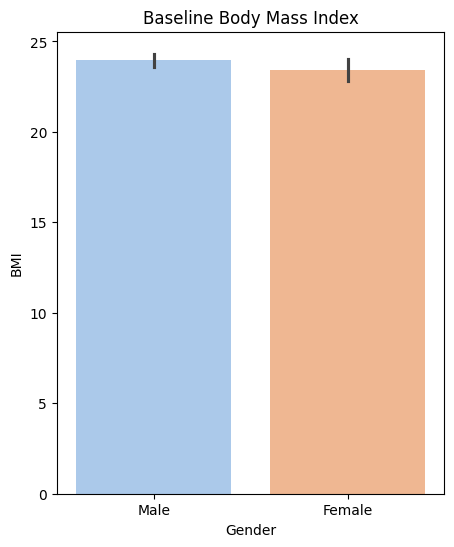

In [ ]:
# Create the figure
fig, ax = plt.subplots(figsize=(5, 6)) #You can play around with the figsize numbers to adjust your figure size

# Fill the axes with the barplot
sns.barplot(data = subjects, x='Sex', y='BMI1', errorbar='se', hue = 'Sex', ax=ax, palette = 'pastel')

# Add figure details
ax.set_title('Baseline Body Mass Index') # set a title
ax.set_xlabel('Gender') # change the x axis label to Gender
ax.set_ylabel('BMI') # change the y axis label to BMI

# Display the figure
plt.show(fig)

In this example, we used standard errors as error bars (`errorbar='se'`). You can change the error bars to 'ci' (confidence interval), 'pi' (percentile interval), or 'sd' (standard deviation) in the sns.barplot function. [More information about error bars in the seaborn plots can be found here.](https://seaborn.pydata.org/tutorial/error_bars.html)

You can also change the color palette (we chose 'pastel'). [Here](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette) you will find examples of seaborn color palettes.



Instead of a bar plot, we could have used ...

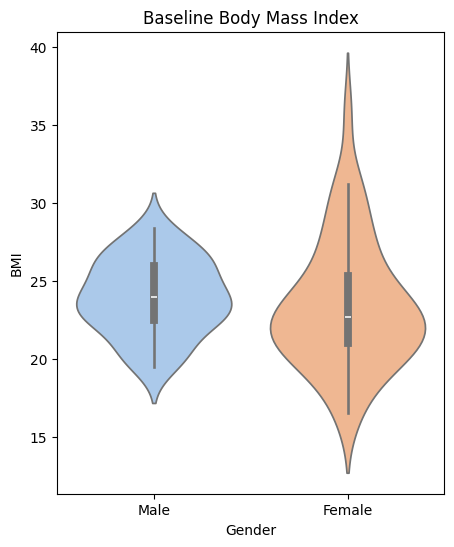

In [ ]:
# a violin plot ...
fig2, ax2 = plt.subplots(figsize=(5, 6))
sns.violinplot(data = subjects, x='Sex', y='BMI1', hue = 'Sex', ax=ax2, palette = 'pastel')
ax2.set_title('Baseline Body Mass Index')
ax2.set_xlabel('Gender')
ax2.set_ylabel('BMI')
plt.show(fig2)

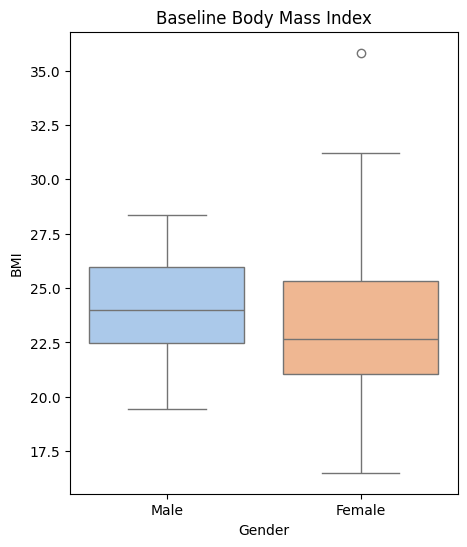

In [ ]:
# ... or a boxplot.
fig3, ax3 = plt.subplots(figsize=(5, 6))
sns.boxplot(data = subjects, x='Sex', y='BMI1', hue = 'Sex', ax=ax3, palette = 'pastel')
ax3.set_title('Baseline Body Mass Index')
ax3.set_xlabel('Gender')
ax3.set_ylabel('BMI')
plt.show(fig3)

Beyond purely descriptive statistical data visualization of your sample, seaborn can also help you visualize e.g. correlations. Let's say you want to visualize the relationship between the Big 5 Inventory personality traits in the sample:

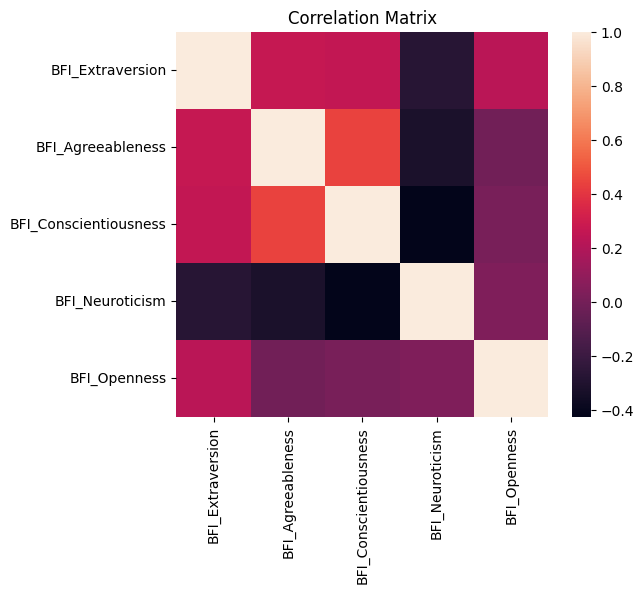

In [ ]:
# Choose the columns you need
correlation_matrix = subjects.loc[:, ['BFI_Extraversion', 'BFI_Agreeableness', 'BFI_Conscientiousness', 'BFI_Neuroticism', 'BFI_Openness']]

# Create a heatmap of the correlations across all those indices
fig4, ax4 = plt.subplots(figsize=(6, 5))
sns.heatmap(data = correlation_matrix.corr(), ax=ax4)
ax4.set_title('Correlation Matrix')
plt.show(fig4)

For a diagonal heatmap (that doesn't show the rather redundant upper part of the correlational matrix), we can create a mask to hide the upper part, and include it into the heatmap figure. Also, we want to change the color palette of the heatmap to coolwarm, and add the individual correlation annotations into the figure. Further documentation on how to create and alter correlational matrices can be found [here](https://seaborn.pydata.org/examples/many_pairwise_correlations.html#).


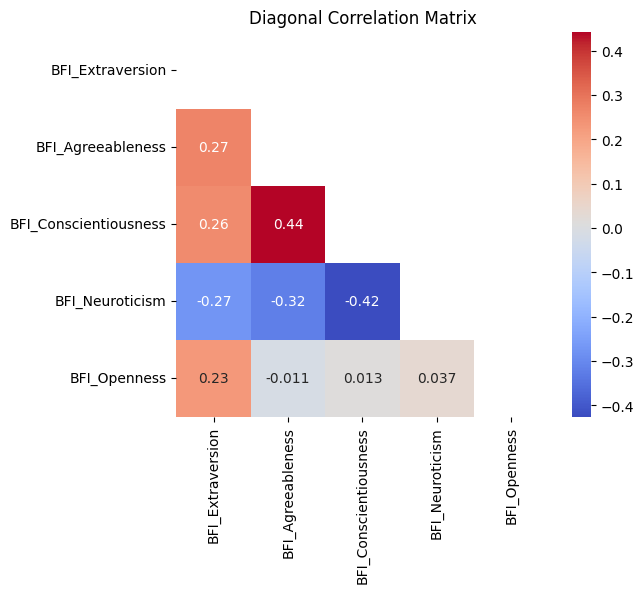

In [ ]:
# Create a mask (upper triangle)
mask = np.triu(np.ones_like(correlation_matrix.corr(), dtype=bool))

# Create the figure
fig5, ax5 = plt.subplots(figsize=(6, 5))
sns.heatmap(data = correlation_matrix.corr(), ax=ax5, mask=mask, annot = True, cmap='coolwarm') # we added the annotation and the new color palette here
ax5.set_title('Diagonal Correlation Matrix')
plt.show(fig5)

Seaborn can furthermore visualize e.g. regression models. Here, we will try and predict the baseline BMI with the age group of the participants. In our dataset, age is coded categorically in 'Young' and 'Old', hence we will fit a logistic regression model. Before we can do that, we need to first turn the categorical 'AgeGroup' string values ('Young' and 'Old') into categorical numeric values (we'll take 0 and 1).

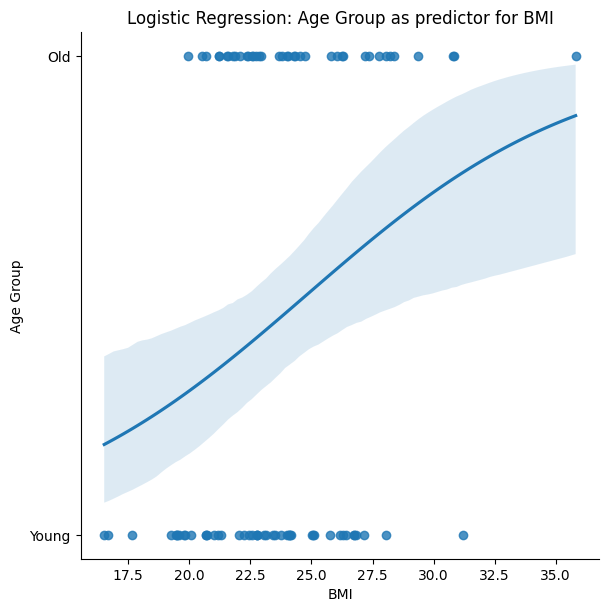

In [ ]:
# Map the categorical 'AgeGroup' values to numeric
subjects['Age_numeric'] = subjects['AgeGroup'].map({'Young': 0, 'Old': 1})

# Now plot the logistic regression with the numeric age column
g = sns.lmplot(data=subjects, x='BMI1', y='Age_numeric', logistic=True, height=6, aspect=1)

plt.title('Logistic Regression: Age Group as predictor for BMI')
plt.xlabel('BMI')
plt.ylabel('Age Group')

# We don't want our y-axis to show the numeric values that we had to put into the regression function, but the original 'young' and 'old' categories.
ax6 = g.ax  # Get the underlying axes object
# Set the y-ticks and y-tick labels
ax6.set_yticks([0, 1])  # Specify where the ticks should appear
ax6.set_yticklabels(['Young', 'Old'])  # Set the labels for these ticks

# Show the plot
plt.show()



The shaded area in the final plot represents the 95% confidence interval derived from the regression model.

**There are many more types of plots that you can use the seaborn library for.**

*Here you can find useful resources for some of them:*

[Multiple linear regression](https://seaborn.pydata.org/examples/multiple_regression.html#multiple-linear-regression) and [estimating regression fits](https://seaborn.pydata.org/tutorial/regression.html)

[Swarmplots (scatterplots with categorical variables)](https://seaborn.pydata.org/examples/scatterplot_categorical.html)

[ANOVA plotting](https://seaborn.pydata.org/examples/pointplot_anova.html)

[And many more](https://seaborn.pydata.org/examples/)

*Resources used to create this tutorial:*

Seaborn documentation: https://seaborn.pydata.org/

Parts of this tutorial were based on the data visualization tutorial of Kelly Chang: https://github.com/NeuroHackademy2024/curriculum/tree/main/chang-visualization